In [1]:
# Import Python libraries and helper functions (in utils2) 
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter

import numpy as np
from matplotlib import pylab as plt
import seaborn as sns
sns.set_style("white")

from utils.wk4_utils import sigmoid, get_batches, compute_pca, get_dict

data_dir = './datasets/'

In [2]:
# Load, tokenize and process the data
import re                                                          

def get_data(fil):
    with open(fil, "r") as f:
        data = f.read()                                     
    data = re.sub(r'[,!?;-]', '.',data)   
    data = nltk.word_tokenize(data)         
    data = [ ch.lower() for ch in data if ch.isalpha() or ch == '.']
    print("Read the data files: Number of tokens:", len(data))    
    return data

In [3]:
def initialize_model(N,V, random_seed=1):
    np.random.seed(random_seed)
    # W1.shape =(N,V); W2.shape=(V,N); b1.shape=(N,1); b2.shape=(V,1)
    W1 = np.random.rand(N,V)
    W2 = np.random.rand(V,N)
    b1 = np.random.rand(N,1)
    b2 = np.random.rand(V,1)

    return W1, W2, b1, b2

def softmax(z):
    e_z = np.exp(z)
    return e_z / np.sum(e_z, axis=0)

def forward_prop(x, W1, W2, b1, b2):
    h = np.dot(W1, x) + b1
    h = np.maximum(0,h)   
    z = np.dot(W2, h) + b2
    return z, h

def compute_cost(y, yhat, batch_size):
    # cross-entropy cost function 
    logprobs = np.multiply(np.log(yhat),y) + np.multiply(np.log(1 - yhat), 1 - y)
    cost = - 1/batch_size * np.sum(logprobs)
    cost = np.squeeze(cost)
    return cost

def back_prop(x, yhat, y, h, W1, W2, b1, b2, batch_size):
    l1 =   np.dot(W2.T, (yhat-y))# W2^T (Yhat - Y)
    l1 = np.maximum(0, l1)
    grad_W1 = (1/batch_size)*np.dot(l1,x.T) #  1/m * relu(w2.T(yhat-y)) . xT
    grad_W2 = (1/batch_size)*np.dot ( yhat-y, h.T)
    grad_b1 = np.sum((1/batch_size)*np.dot(l1,x.T),axis=1,keepdims=True)
    grad_b2 = np.sum((1/batch_size)*np.dot(yhat-y,h.T),axis=1,keepdims=True)
    
    return grad_W1, grad_W2, grad_b1, grad_b2


In [4]:
def gradient_descent(data, word2Ind, V, N=50, num_iters=150, alpha=0.03, plot_cost=False, verbose=True):
    W1, W2, b1, b2 = initialize_model(N,V, random_seed=282)
    batch_size = 128
    iters = 0
    C = 2
    costL = []
    for x, y in get_batches(data, word2Ind, V, C, batch_size):
        z, h = forward_prop(x, W1, W2, b1, b2)
        yhat = softmax(z)
        cost = compute_cost(y, yhat, batch_size)
        costL.append(cost)
        if verbose:
            if ( (iters+1) % 10 == 0):
                print(f"iters: {iters + 1} cost: {cost:.6f}")
        grad_W1, grad_W2, grad_b1, grad_b2 = back_prop(x, yhat, y, h, W1, W2, b1, b2, batch_size)
        
        # Update weights and biases
        W1 -= alpha * grad_W1
        W2 -= alpha * grad_W2
        b1 -= alpha * grad_b1
        b2 -= alpha * grad_b2
        
        iters += 1 
        
        if (cost<1e-2) or (iters == num_iters): 
            break
        
        if iters % 100 == 0:
            alpha *= 0.66

    if plot_cost:
        fig,ax = plt.subplots(1,1, figsize=(6,4))
        ax.plot(range(len(costL)), costL, '-o', label='Cost')
        ax.legend();
        
    print (f"Gradient Descent Finished.")
            
    return W1, W2, b1, b2

Read the data files: Number of tokens: 60996
Size of vocabulary:  5778
iters: 10 cost: 0.107177
iters: 20 cost: 0.038644
iters: 30 cost: 0.023685
iters: 40 cost: 0.017095
iters: 50 cost: 0.013380
iters: 60 cost: 0.010995
Gradient Descent Finished.


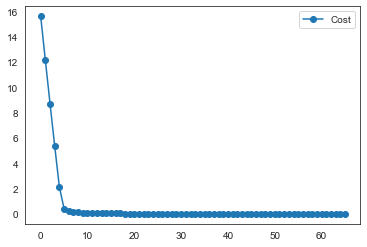

In [5]:
def main():

    #  ---------------------------------------------  #
    data = get_data(data_dir+'shakespeare.txt')    
    #  ---------------------------------------------  #
    word2Ind, Ind2word = get_dict(data)
    V = len(word2Ind)
    print("Size of vocabulary: ", V)
    #  ---------------------------------------------  #
    W1, W2, b1, b2 = gradient_descent(data, word2Ind, V, plot_cost=True)
    
main()

In [6]:

data = get_data(data_dir+'shakespeare.txt')    
word2Ind, Ind2word = get_dict(data)
V = len(word2Ind)
W1, W2, b1, b2 = gradient_descent(data, word2Ind, V, plot_cost=False, verbose=False)

Read the data files: Number of tokens: 60996
Gradient Descent Finished.


In [7]:
# visualizing the word vectors here
words = ['king', 'queen','lord','man', 'woman',
         'dog','horse', 'rich','happy','sad']

embs = (W1.T + W2)/2.0

# given a list of words and the embeddings, it returns a matrix with all the embeddings
idx = [word2Ind[word] for word in words]
print (embs.shape)
X = embs[idx, :]
print(X.shape, idx)  # X.shape:  Number of words of dimension N each 

(5778, 50)
(10, 50) [2745, 3951, 2961, 3023, 5675, 1452, 2472, 4191, 2316, 4278]


result.shape: (10, 2)


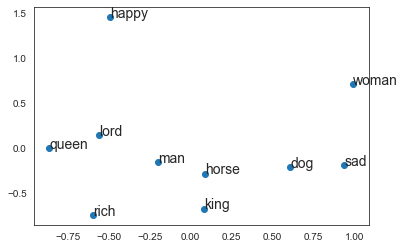

In [8]:
result= compute_pca(X, 2)
print (f"result.shape: {result.shape}")

plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]), fontsize=14)
plt.show()

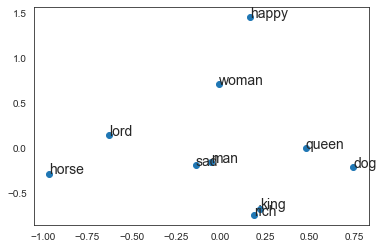

In [9]:
result= compute_pca(X, 4)
plt.scatter(result[:, 3], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 3], result[i, 1]), fontsize=14)
plt.show()